In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import torch

# Task1.

*Task 1-1. 데이터 불러오기*

In [2]:
data = pd.read_csv('./p01_input.csv', encoding = 'cp949') #한글로 인코딩
data.head(3)

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0


*Task 1-2. 데이터 중에서 키와 몸무게 데이터만 골라내기*

In [3]:
he_we = data[['키', '몸무게']]
he_we.head(3)

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5


# Task 2. 학생들의 평균키와 평균 몸무게 구하기

In [4]:
he_we.mean()

키      154.564444
몸무게     50.207591
dtype: float64

In [5]:
print(round(he_we['키'].mean(),2))
print(round(he_we['몸무게'].mean(),2))

154.56
50.21


In [6]:
print('평균 키: '+ str(round(he_we.mean()[0],2)) + 'cm' \
      + '\n평균 몸무게: '+ str(round(he_we.mean()[1],2))+ 'kg')

평균 키: 154.56cm
평균 몸무게: 50.21kg


# Task 3. 키와 몸무게 사이의 상관관계(Pearson Correlation Coeffcient) 구하기

### 결측치 행 삭제

In [7]:
null_idx = he_we.query("키 == 'NaN' or 몸무게 == 'NaN'").index.tolist()
he_we = he_we.drop(null_idx)

In [8]:
#피어슨 유사도 함수
def pearson_cor(v1, v2):
    v1_c = v1 - v1.mean()
    v2_c = v2 - v2.mean()
    denom = np.sqrt(np.sum(v1_c ** 2) * np.sum(v2_c ** 2))
    if denom != 0:
        return round(np.sum(v1_c * v2_c) / denom, 5)
    else:
        return 0 # 값이 0이라면 0을 반환

In [9]:
#피어슨 상관계수 함수 실행
height = he_we['키']
weight = he_we['몸무게']

print('피어슨 상관계수: ' + str(pearson_cor(height, weight)))

피어슨 상관계수: 0.84901


# Task 4. Linear Regression을 사용하여 키와 몸무게 사이의 선형관계를 찾기
<p>(직선의 방정식 구하기: y = wx + b에서 w와 b의 값을 구하기) </p>

*Task 4-1. 가설, 비용 설정하기*

In [10]:
# 키(x), 몸무게(y)를 Tensor자료 구조로 변경.
x_train = torch.unsqueeze(torch.FloatTensor(he_we['키']), dim = 1)
y_train = torch.unsqueeze(torch.FloatTensor(he_we['몸무게']), dim = 1)

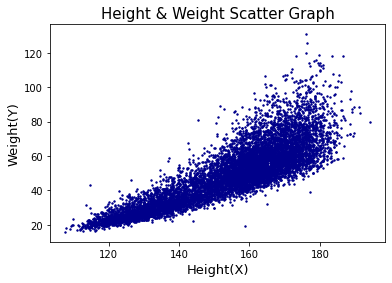

In [11]:
# 주어진 데이터의 산포도 확인
plt.scatter(x_train, y_train, c = 'darkblue', s = 2)

plt.title('Height & Weight Scatter Graph', fontsize = 15)
plt.ylabel("Weight(Y)", fontsize = 13)
plt.xlabel("Height(X)", fontsize = 13)

plt.show()

In [12]:
# W, b 초기화
W = torch.zeros(1, 1)
b = torch.zeros(1, 1)

# learning rate를 0.01로 하였을 때 overshooting 발생..
# 매우 작은수로 설정하였을 때 발산하지 않았음.
lr = 1e-5

In [13]:
#가설 & 비용
hypothesis = x_train * W + b
cost = torch.mean((hypothesis - y_train) ** 2)

*Task 4-2. 가설, 경사하강법으로 비용을 최소로 만들도록 학습하기(torch.optim 사용하지 말고 구현해보기)*

In [14]:
for epoch in range(10001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    # hypothesis, cost 설정
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # 경사 계산
    # W, b 업데이트
    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad
    
    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, W: {W.squeeze().item():.6f}, b: {b.item():.6f}, cost: {cost.item():.6f}")

epoch: 0, W: 0.160127, b: 0.001004, cost: 2812.360352
epoch: 1000, W: 0.331249, b: -0.017394, cost: 161.121124
epoch: 2000, W: 0.331373, b: -0.036880, cost: 161.083160
epoch: 3000, W: 0.331498, b: -0.056362, cost: 161.045227
epoch: 4000, W: 0.331622, b: -0.075839, cost: 161.007278
epoch: 5000, W: 0.331747, b: -0.095311, cost: 160.969330
epoch: 6000, W: 0.331871, b: -0.114780, cost: 160.931412
epoch: 7000, W: 0.331996, b: -0.134242, cost: 160.893509
epoch: 8000, W: 0.332120, b: -0.153703, cost: 160.855682
epoch: 9000, W: 0.332245, b: -0.173158, cost: 160.817810
epoch: 10000, W: 0.332369, b: -0.192604, cost: 160.779984


In [15]:
print('<경사하강법의 결과> \nW= ' + str(round(W.item(),4)) + \
      ' b= ' + str(round(b.item(), 4)))

<경사하강법의 결과> 
W= 0.3324 b= -0.1926


# Task5. Matplotlib을 사용하여 좌표평면상에 입력값(키, 몸무게)과 구한 직선 그려보기

*Task 5-1. 입력값(키, 몸무게)를 산포도로 그리기(x축 = 키, y축 = 몸무게)*

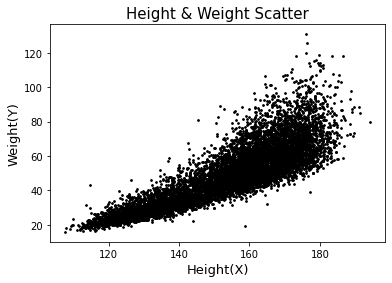

In [16]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c = "black", label = "Training Data", s = 3)

plt.title('Height & Weight Scatter', fontsize = 15)
plt.ylabel("Weight(Y)", fontsize = 13)
plt.xlabel("Height(X)", fontsize = 13)

plt.show()

*Task 5-2. w, b값을 이용하여 직선 그리기(산포도와 일치하는지 확인하여 학습이 잘 되었는지 확인하기 위함.*

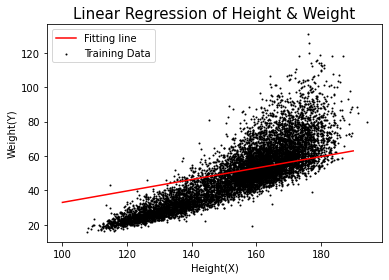

In [17]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c = "black", label = "Training Data", s = 1)
plt.ylabel("Weight(Y)")
plt.xlabel("Height(X)")

X = torch.linspace(100, 190).unsqueeze(1)
Y = X * W + b

plt.title('Linear Regression of Height & Weight', fontsize = 15)
plt.ylabel("Weight(Y)")
plt.xlabel("Height(X)")

plt.plot(X, Y, c = "red", label = "Fitting line")
plt.legend()
plt.show()